In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns


In [125]:
df = sns.load_dataset('titanic')

df.drop(columns=['deck','who','adult_male','alive','alone','embarked','pclass'], inplace=True)

df.fillna({
    'age': df['age'],
    'embark_town': df['embark_town']
}, inplace=True)

df

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,Southampton
887,1,female,19.0,0,0,30.0000,First,Southampton
888,0,female,NaN,1,2,23.4500,Third,Southampton
889,1,male,26.0,0,0,30.0000,First,Cherbourg


In [126]:
le = LabelEncoder()

for col in ['sex', 'class', 'embark_town']:
    df[col] = le.fit_transform(df[col])

In [127]:
x = df.drop("survived",axis=1)
y = df["survived"]

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [129]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [130]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0])

In [131]:
accuracy = accuracy_score(y_pred,y_test)
print(f"{accuracy * 100:.2f}%")

75.42%


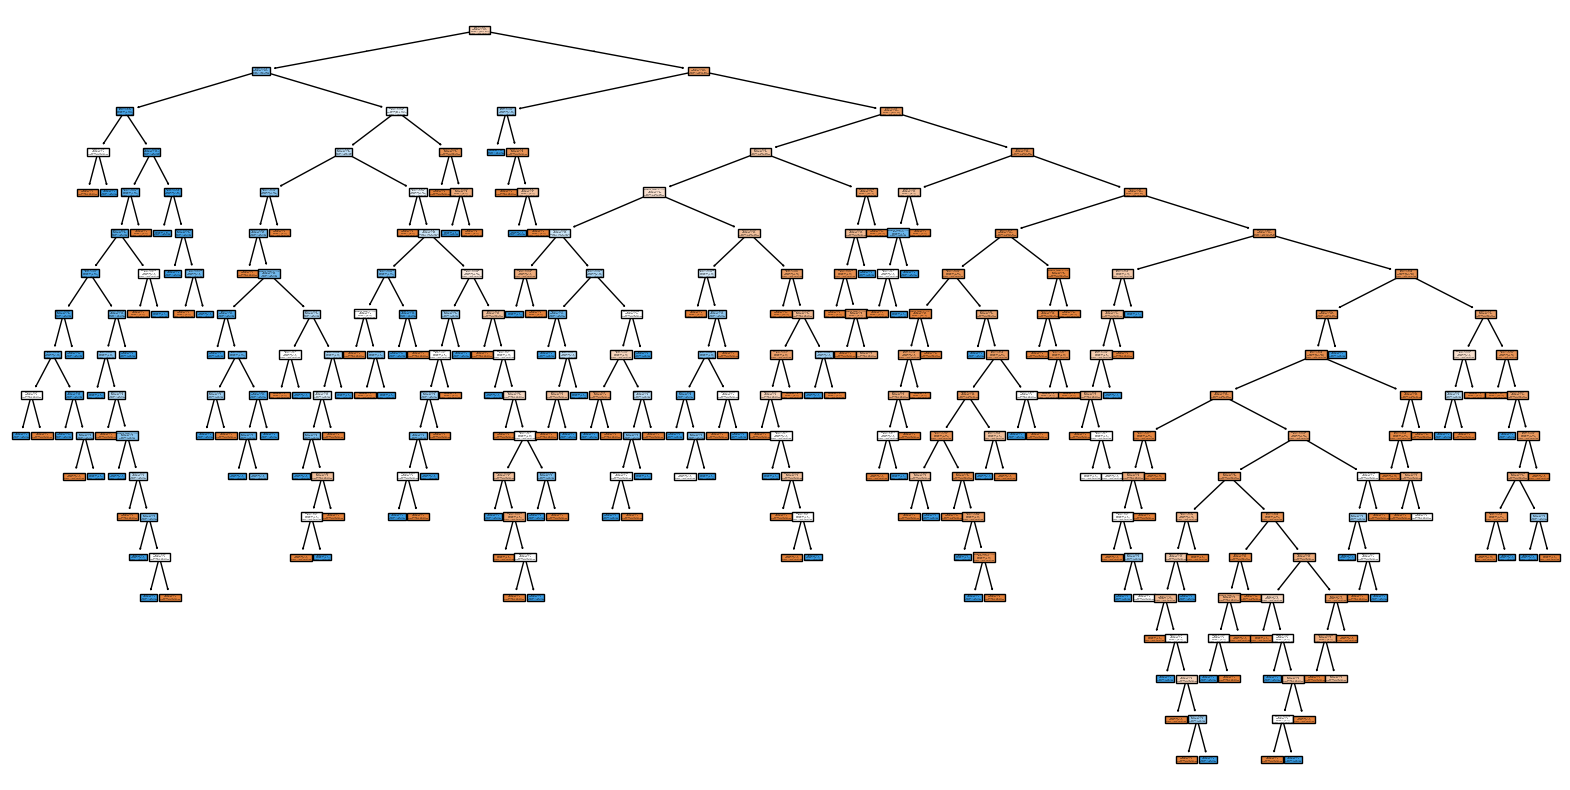

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model,feature_names=["sex","age","sibsp","parch","fare","class","embark_town"],class_names=['Not Survived', 'Survived'],filled=True)
plt.show()

In [ ]:
new_passenger = pd.DataFrame({
    'sex': [1],           
    'age': [25],
    'sibsp': [1],
    'parch': [0],
    'fare': [50],
    'class': [0],        
    'embark_town': [2]    
})

prediction = model.predict(new_passenger)
print("Prediction:", "Survived" if prediction[0] == 1 else "Not Survived")

Prediction: Survived
